<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Naïve Bayes Classification

## Overview

- [Description](#Description)
- [Gaussian Naive Bayes](#Gaussian-Naive-Bayes)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

Naive Bayes is a very simple classification algorithm based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. Nevertheless, it has shown to be effective in a large number of problem domains.

Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Using the **naive independence** assumption that

$$P(x_i \mid y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i \mid y)$$

for all i, this relationship is simplified to

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

$$\Downarrow$$

$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$

and we can use **Maximum A Posteriori (MAP)** estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class y in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters. (For theoretical reasons why naive Bayes works well, and on which types of data it does, see the references below.)  

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.  

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a *bad estimator*, so the probability outputs are not to be taken too seriously.

More information:
- [Naive Bayes - Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [Naive Bayes and Text Classification](http://sebastianraschka.com/Articles/2014_naive_bayes_1.html)

## Gaussian Naive Bayes

[GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:  

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>GaussianNB</strong> (priors=None)
<br/>
Returns:
<ul>
<li>class\_prior\_: probability of each class</li>
<li>class\_count\_: number of training samples observed in each class</li>
<li>theta\_: mean of each feature per class</li>
<li>sigma\_: variance of each feature per class</li>
</ul>
</div>

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

In [2]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [7]:
gnb.class_prior_

array([ 0.36190476,  0.32380952,  0.31428571])

In [8]:
gnb.class_count_

array([ 38.,  34.,  33.])

In [9]:
gnb.theta_

array([[ 5.00526316,  3.41578947,  1.47894737,  0.24736842],
       [ 5.88529412,  2.69705882,  4.19411765,  1.29411765],
       [ 6.66363636,  2.99393939,  5.62727273,  2.06363636]])

In [10]:
gnb.theta_[:,0].mean()

5.8513978797260542

In [11]:
print('Accuracy: {0}'.format(gnb.score(X_test, y_test)))
y_pred = gnb.predict(X_test)
print('Number of mislabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.8888888888888888
Number of mislabeled points: 5


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [12]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.9111111111111111
Number of mislabeled points: 4


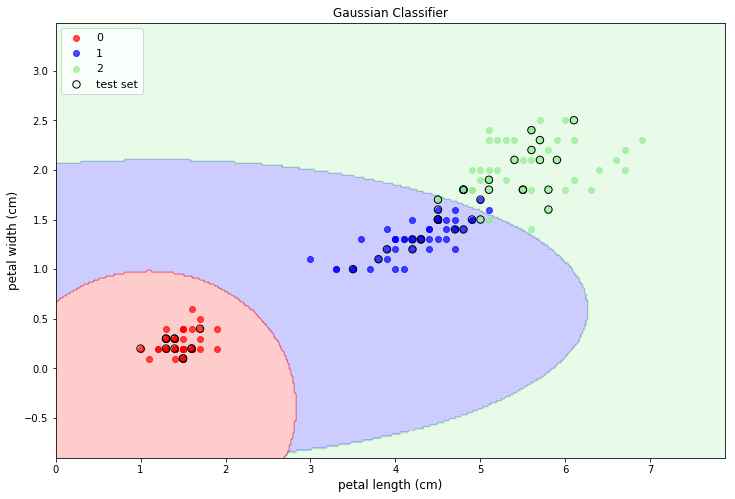

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
gnb.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=gnb, test_marker=True)
plt.title('Gaussian Classifier')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')